In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast

In [2]:
df = pd.read_csv("all_data/ppt_processed.csv")
df.head()

,review,token,rating,sentiment
0,Ugh I hated the last book in this series- what...,"['ugh', 'hat', 'last', 'book', 'in', 'series',...",1,0
1,"This started out strong, but it went downhill ...","['start', 'out', 'strong', 'but', 'go', 'downh...",1,0
2,"A decently written YA book, but I can't even c...","['decently', 'write', 'ya', 'book', 'but', 'ca...",1,0
3,This book simultaneously bored me to death and...,"['book', 'simultaneously', 'bore', 'death', 'a...",1,0
4,"Ugh...I tried, I honestly tried. I'm a huge fa...","['ugh', 'try', 'honestly', 'try', 'huge', 'fan...",1,0


In [3]:
df["token"] = df["token"].apply(lambda x: ast.literal_eval(x))
df.head()

,review,token,rating,sentiment
0,Ugh I hated the last book in this series- what...,"[ugh, hat, last, book, in, series, poor, way, ...",1,0
1,"This started out strong, but it went downhill ...","[start, out, strong, but, go, downhill, fairly...",1,0
2,"A decently written YA book, but I can't even c...","[decently, write, ya, book, but, can, even, co...",1,0
3,This book simultaneously bored me to death and...,"[book, simultaneously, bore, death, annoy, hel...",1,0
4,"Ugh...I tried, I honestly tried. I'm a huge fa...","[ugh, try, honestly, try, huge, fan, scott, we...",1,0


In [4]:
df["num_words"] = df["token"].apply(lambda x: len(x))

In [16]:
df["ten"] = df["num_words"].apply(lambda x: 1 if (x > 10 and x <= 30) else 0)
df["thirty"] = df["num_words"].apply(lambda x: 1 if (x > 30 and x <= 50) else 0)
df["fifty"] = df["num_words"].apply(lambda x: 1 if (x > 50 and x <= 100) else 0)
df["hundred"] = df["num_words"].apply(lambda x: 1 if (x > 100 and x <= 200) else 0)
df["two_hundred"] = df["num_words"].apply(lambda x: 1 if (x > 200 and x <= 500) else 0)
df["five_hundred"] = df["num_words"].apply(lambda x: 1 if x > 500 else 0)
df["thousand"] = df["num_words"].apply(lambda x: 1 if (x > 500 and x <= 1000) else 0)

In [8]:
df.describe()

,rating,sentiment,num_words
count,20000.000000,20000.000000,20000.000000
mean,3.000000,0.500000,88.620350
std,1.581178,0.500013,125.832078
min,1.000000,0.000000,0.000000
25%,1.750000,0.000000,15.000000
50%,3.000000,0.500000,41.000000
75%,4.250000,1.000000,109.000000
max,5.000000,1.000000,2185.000000


In [18]:
print(df["ten"].sum())
print(df["thirty"].sum())
print(df["fifty"].sum())
print(df["hundred"].sum())
print(df["two_hundred"].sum())
print(df["five_hundred"].sum())
print(df["thousand"].sum())

4727
2705
3542
2797
2254
336
307


(array([6.580e+03, 3.692e+03, 2.238e+03, 1.470e+03, 1.027e+03, 7.490e+02,
        6.580e+02, 4.940e+02, 4.240e+02, 4.170e+02, 3.410e+02, 2.720e+02,
        2.250e+02, 2.170e+02, 1.710e+02, 1.450e+02, 1.190e+02, 1.060e+02,
        9.200e+01, 7.100e+01, 4.700e+01, 7.400e+01, 4.000e+01, 3.300e+01,
        3.600e+01, 4.000e+01, 2.200e+01, 2.100e+01, 2.700e+01, 2.400e+01,
        1.100e+01, 1.800e+01, 1.200e+01, 5.000e+00, 7.000e+00, 9.000e+00,
        5.000e+00, 3.000e+00, 1.200e+01, 2.000e+00, 1.000e+00, 3.000e+00,
        5.000e+00, 2.000e+00, 2.000e+00, 3.000e+00, 0.000e+00, 1.000e+00,
        4.000e+00, 5.000e+00, 1.000e+00, 3.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        2.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

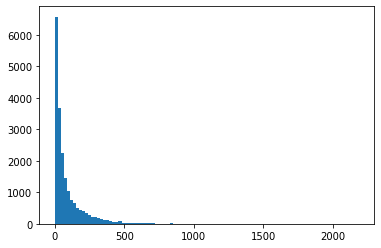

In [21]:
plt.hist(df["num_words"], bins=100)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcef9fb6970>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcef9fb6f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcef9fb66a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcef346d4f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcef346d7c0>],
 'means': []}

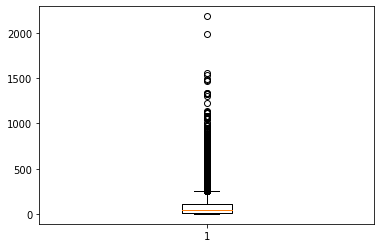

In [19]:
plt.boxplot(df["num_words"])

In [5]:
df2 = df[(df["num_words"] >= 15) & (df["num_words"] <= 150)]
# df2 = df2.drop(["num_words"], axis=1)
df2.head()

,review,token,rating,sentiment,num_words
1,"This started out strong, but it went downhill ...","[start, out, strong, but, go, downhill, fairly...",1,0,83
2,"A decently written YA book, but I can't even c...","[decently, write, ya, book, but, can, even, co...",1,0,32
4,"Ugh...I tried, I honestly tried. I'm a huge fa...","[ugh, try, honestly, try, huge, fan, scott, we...",1,0,47
6,Main points: \n 1. Never ever introduce a poin...,"[main, point, never, ever, introduce, point, v...",1,0,97
7,Why do all YA books have to have a love triang...,"[all, ya, book, love, triangle, now, just, who...",1,0,31


In [7]:
df2["sentiment"].value_counts()

0    5827
1    5717
Name: sentiment, dtype: int64

In [14]:
df3 = df2[df2["sentiment"] == 0][:5700]
df4 = df2[df2["sentiment"] == 1][:5700]
df5 = pd.concat([df3, df4])
df5 = df5.drop(["num_words"], axis=1)
df5

,review,token,rating,sentiment
1,"This started out strong, but it went downhill ...","[start, out, strong, but, go, downhill, fairly...",1,0
2,"A decently written YA book, but I can't even c...","[decently, write, ya, book, but, can, even, co...",1,0
4,"Ugh...I tried, I honestly tried. I'm a huge fa...","[ugh, try, honestly, try, huge, fan, scott, we...",1,0
6,Main points: \n 1. Never ever introduce a poin...,"[main, point, never, ever, introduce, point, v...",1,0
7,Why do all YA books have to have a love triang...,"[all, ya, book, love, triangle, now, just, who...",1,0
...,...,...,...,...
19954,Was a little wary of starting this one since t...,"[little, wary, start, one, since, last, couple...",5,1
19959,Oh my god. I just now finished the book and I'...,"[oh, god, just, now, finish, book, still, blur...",5,1
19960,"WOW!!! \n What an intense story. I won't, as a...","[wow, intense, story, win, always, give, any, ...",5,1
19962,Will and Sasha. So glad the story stayed true ...,"[will, sasha, so, glad, story, stay, true, fir...",5,1


In [15]:
with pd.option_context("display.max_rows", 8, "display.max_colwidth", 100, "display.colheader_justify", "left"):
    display(df5)

,review,token,rating,sentiment
1,"This started out strong, but it went downhill fairly quickly. It's not like there weren't good t...","[start, out, strong, but, go, downhill, fairly, quickly, not, like, there, weren, good, things, ...",1,0
2,"A decently written YA book, but I can't even consider the ending to be one. More like its missin...","[decently, write, ya, book, but, can, even, consider, end, one, more, like, miss, last, few, cha...",1,0
4,"Ugh...I tried, I honestly tried. I'm a huge fan of Scott Westerfeld...the Uglies series is among...","[ugh, try, honestly, try, huge, fan, scott, westerfeld, uglies, series, among, literary, favorit...",1,0
6,Main points: \n 1. Never ever introduce a point of view side character in the third book of a se...,"[main, point, never, ever, introduce, point, view, side, character, in, third, book, series, not...",1,0
...,...,...,...,...
19959,Oh my god. I just now finished the book and I'm still blurbing like a baby ahhh you got me good ...,"[oh, god, just, now, finish, book, still, blurbing, like, baby, ahhh, get, good, on, one, lu, de...",5,1
19960,"WOW!!! \n What an intense story. I won't, as always give any spoilers, but I have to say that I ...","[wow, intense, story, win, always, give, any, spoilers, but, say, hard, time, put, down, kindle,...",5,1
19962,Will and Sasha. So glad the story stayed true to the first one and we got to know Nuka's little ...,"[will, sasha, so, glad, story, stay, true, first, one, get, know, nuka, little, brother, see, fa...",5,1
19964,Wow. Wow. WOW. I've had huge expectations for this book from the moment I stumbled across it. Th...,"[wow, wow, wow, huge, expectations, book, moment, stumble, across, thankfully, every, single, on...",5,1


In [16]:
df5 = df5.rename(columns={"token": "text"})
df5.head()

,review,text,rating,sentiment
1,"This started out strong, but it went downhill ...","[start, out, strong, but, go, downhill, fairly...",1,0
2,"A decently written YA book, but I can't even c...","[decently, write, ya, book, but, can, even, co...",1,0
4,"Ugh...I tried, I honestly tried. I'm a huge fa...","[ugh, try, honestly, try, huge, fan, scott, we...",1,0
6,Main points: \n 1. Never ever introduce a poin...,"[main, point, never, ever, introduce, point, v...",1,0
7,Why do all YA books have to have a love triang...,"[all, ya, book, love, triangle, now, just, who...",1,0


In [17]:
df5.to_csv("cleaned_data/cleaned_reviews_3.csv", index=False)